# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [3]:

df_restaurant= pd.read_csv("new_dataset1.csv")
df_restaurant.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637.0,Le Petit Souffle,162.0,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287.0,Izakaya Kikufuji,162.0,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002.0,Heat - Edsa Shangri-La,162.0,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506.0,Ooma,162.0,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302.0,Sambo Kojin,162.0,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


# Data Understanding

In [4]:
df_restaurant.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   float64
 1   Restaurant Name       9557 non-null   object 
 2   Country Code          9551 non-null   float64
 3   City                  9557 non-null   object 
 4   Address               9557 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9547 non-null   float64
 8   Latitude              9547 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9545 non-null   float64
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df_restaurant.shape

(9557, 21)

# Handling missing values

In [6]:
missing_value = print("Missing values:\n", df_restaurant.isnull().sum())  #checking the missing values
missing_value

Missing values:
 Restaurant ID            6
Restaurant Name          0
Country Code             6
City                     0
Address                  0
Locality                 6
Locality Verbose         6
Longitude               10
Latitude                10
Cuisines                15
Average Cost for two    12
Currency                 6
Has Table booking        6
Has Online delivery      6
Is delivering now        6
Switch to order menu     6
Price range              8
Aggregate rating        12
Rating color             8
Rating text             10
Votes                   12
dtype: int64


In [7]:
duplicates= df_restaurant.drop_duplicates(inplace=True)    # drop the duplicate rows
duplicates

In [8]:
categorical_cols = ['Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery']    # Cleaning the Columns
for col in categorical_cols:
    df_restaurant[col] = df_restaurant[col].fillna(df_restaurant[col].mode()[0])

In [9]:
critical_cols = ['City', 'Cuisines', 'Aggregate rating']
df_restaurant.dropna(subset=critical_cols, inplace=True)

In [10]:
numeric_cols = df_restaurant.select_dtypes(include='number').columns
df_restaurant[numeric_cols] = df_restaurant[numeric_cols].fillna(df_restaurant[numeric_cols].median())

In [11]:
if 'Online delivery' in df_restaurant.columns:
    df_restaurant['Online delivery'] = df_restaurant['Online delivery'].str.lower().map({'yes': 1, 'no': 0})

In [12]:
if 'Aggregate Rating' in df_restaurant.columns:
    df_restaurant['Aggregate Rating'] = pd.to_numeric(df_restaurant['Aggregate Rating'], errors='coerce')
if 'Price range' in df_restaurant.columns:
    df_restaurant['Price range'] = pd.to_numeric(df_restaurant['Price range'], errors='coerce')

In [13]:
print("Cleaned dataset shape:", df_restaurant.shape)
print("Data types:\n", df_restaurant.dtypes)


Cleaned dataset shape: (9545, 21)
Data types:
 Restaurant ID           float64
Restaurant Name          object
Country Code            float64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object


In [14]:
missing_values= print("Missing values:\n", df_restaurant.isnull().sum())
missing_values

Missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [15]:
column_names = print("Column names:\n", df_restaurant.columns)
column_names

Column names:
 Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


# Level 1 

### Task 1 : Top Cuisines
###  Determine the top three most common cuisines in the dataset. Calculate the percentage of restaurants that serve each of the top cuisines.


In [16]:
top_cuisines = df_restaurant['Cuisines'].value_counts().head(5)
top_cuisines


Cuisines
North Indian             945
North Indian, Chinese    511
Fast Food                354
Chinese                  354
North Indian, Mughlai    334
Name: count, dtype: int64

In [17]:
cuisine_percentage  = round((top_cuisines / len(df_restaurant)) * 100, 2)

cuisine_percentage 



Cuisines
North Indian             9.90
North Indian, Chinese    5.35
Fast Food                3.71
Chinese                  3.71
North Indian, Mughlai    3.50
Name: count, dtype: float64

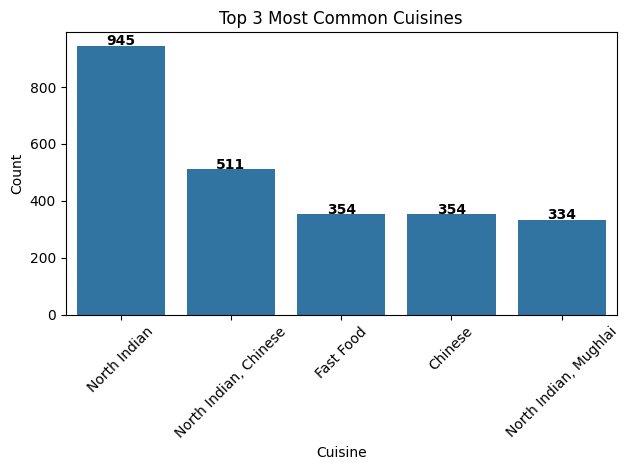

In [18]:
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)

plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

for index, value in enumerate(top_cuisines.values):
    plt.text(index, value + 1, str(value), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### Task 2 : City Analysis
### Identify the city with the highest number of restaurants in the dataset. Calculate the average rating for restaurants in each city. Determine the city with the highest average rating.


In [19]:
# City with highest restaurant

city_counts = df_restaurant['City'].value_counts()

city_counts


City
New Delhi         5472
Gurgaon           1117
Noida             1078
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

In [20]:
top_city = city_counts.idxmax()

top_city

'New Delhi'

In [21]:
# average ratings per city

city_avg_rating = df_restaurant.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

city_avg_rating

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438743
Montville           2.400000
Mc Millan           2.400000
Noida               2.039981
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64

In [22]:
# highest rated city

highest_avg_city = city_avg_rating.idxmax()

highest_avg_city

'Inner City'

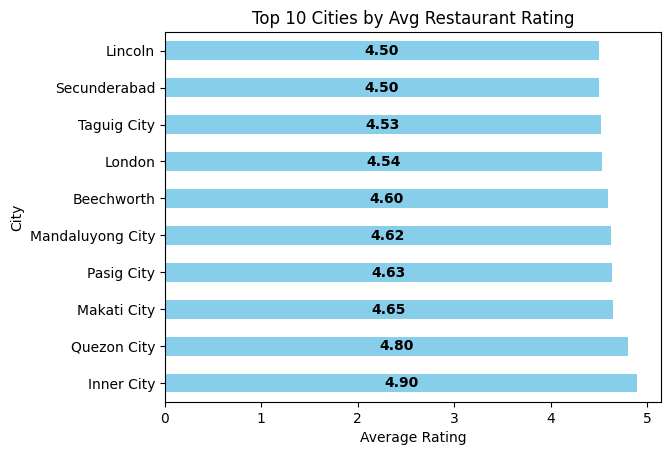

In [23]:
fig, ax = plt.subplots()
city_avg_rating.head(10).plot(kind='barh', color='skyblue')

plt.title('Top 10 Cities by Avg Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')

for i, (index, value) in enumerate(city_avg_rating.head(10).items()):
    ax.text(value / 2, i, f'{value:.2f}', va='center', ha='center', color='black', fontweight='bold')

plt.show()

### Task 3 : Price Range Distribution 
### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.Calculate the percentage of restaurants in each price range category.


 Price Range Distribution (%):
 Price range
1.0    46.55
2.0    32.57
3.0    14.75
4.0     6.13
Name: proportion, dtype: float64


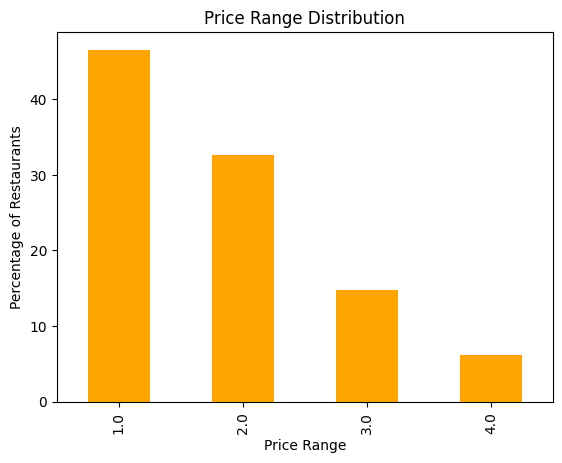

In [24]:
price_dist = df_restaurant['Price range'].value_counts(normalize=True) * 100
print(" Price Range Distribution (%):\n", round(price_dist, 2))

price_dist.plot(kind='bar', color='orange')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')

plt.show()

### Task 4 : Online Delivery
### Determine the percentage of restaurants that offer online delivery. Compare the average ratings of restaurants with and without online delivery.


In [25]:
print(df_restaurant['Has Online delivery'].value_counts(dropna=False))


Has Online delivery
No     7095
Yes    2450
Name: count, dtype: int64


In [26]:

df_restaurant['Has Online delivery'] = (
    df_restaurant['Has Online delivery']
    .astype(str)
    .str.strip()
    .str.lower()
)


print("Cleaned values:", df_restaurant['Has Online delivery'].unique())


Cleaned values: ['no' 'yes']


In [27]:
df_restaurant['Has Online delivery'] = df_restaurant['Has Online delivery'].map({
    'yes': 1,
    'no': 0
})


In [28]:
print(df_restaurant['Has Online delivery'].value_counts(dropna=False))


Has Online delivery
0    7095
1    2450
Name: count, dtype: int64


In [29]:
delivery_percent = df_restaurant['Has Online delivery'].value_counts(normalize=True, dropna=False) * 100
print(delivery_percent.round(2))


Has Online delivery
0    74.33
1    25.67
Name: proportion, dtype: float64


In [30]:
avg_rating_yes = df_restaurant[df_restaurant['Has Online delivery'] == 1]['Aggregate rating'].mean()

avg_rating_yes


np.float64(3.2486938775510206)

In [31]:
avg_rating_no = df_restaurant[df_restaurant['Has Online delivery'] == 0]['Aggregate rating'].mean()
avg_rating_no

np.float64(2.465623678646934)

In [32]:
print("🚚 Online Delivery Distribution (%):\n", delivery_percent.round(2))


🚚 Online Delivery Distribution (%):
 Has Online delivery
0    74.33
1    25.67
Name: proportion, dtype: float64


In [33]:
print(f"⭐ Avg Rating with Delivery: {avg_rating_yes:.2f}")
print(f"⭐ Avg Rating without Delivery: {avg_rating_no:.2f}")

⭐ Avg Rating with Delivery: 3.25
⭐ Avg Rating without Delivery: 2.47


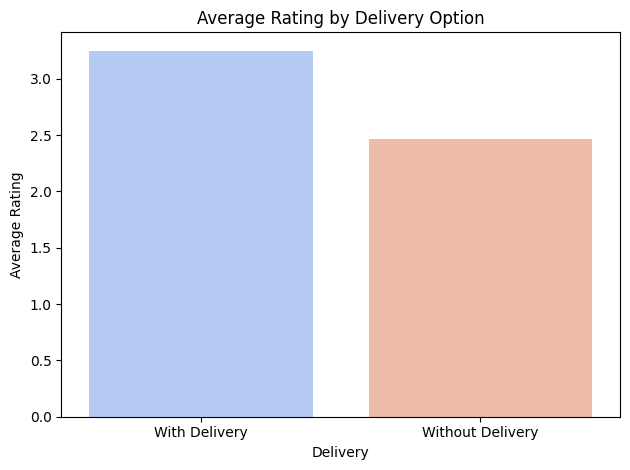

In [34]:
df = pd.DataFrame({
    'Delivery': ['With Delivery', 'Without Delivery'],
    'Rating': [avg_rating_yes, avg_rating_no]
})

 
sns.barplot(data=df, x='Delivery', y='Rating', hue='Delivery', palette='coolwarm', legend=False)
plt.title('Average Rating by Delivery Option')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


## Level 2

### Task 1 : Restaurant Ratings
### Analyze the distribution of aggregate ratings and determine the most common rating range. Calculate the average number of votes received by restaurants.


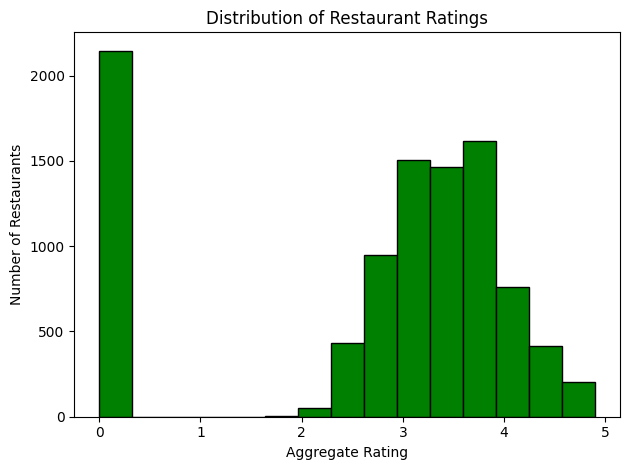

In [35]:

df_restaurant['Aggregate rating'].plot.hist(
    bins=15, 
    color='green', 
    edgecolor='black'
)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

In [36]:
most_common_rating = df_restaurant['Aggregate rating'].mode()[0]
print(f"🌟 Most Common Rating: {most_common_rating}")


🌟 Most Common Rating: 0.0


In [37]:
zero_rating_count = df_restaurant[df_restaurant['Aggregate rating'] == 0.0].shape[0]
total_restaurants = df_restaurant.shape[0]
print(f"🧐 Restaurants with 0.0 Rating: {zero_rating_count} out of {total_restaurants}")


🧐 Restaurants with 0.0 Rating: 2146 out of 9545


In [38]:

rated_restaurants = df_restaurant[df_restaurant['Aggregate rating'] > 0]

most_common_rated = rated_restaurants['Aggregate rating'].mode()[0]
print(f"🌟 Most Common Rating (excluding 0.0): {most_common_rated}")


🌟 Most Common Rating (excluding 0.0): 3.2


In [39]:
avg_votes = df_restaurant['Votes'].mean()
print(f"🗳️ Average Number of Votes per Restaurant: {avg_votes:.2f}")


🗳️ Average Number of Votes per Restaurant: 156.99


### Task 2 : Cuisine Combination
### Identify the most common combinations of cuisines in the dataset.  Determine if certain cuisine combinations tend to have higher ratings.

In [40]:

df_restaurant['Cuisines'] = df_restaurant['Cuisines'].astype(str).str.strip()

combo_counts = df_restaurant['Cuisines'].value_counts().head(5)
print("🍜 Top Cuisine Combinations:\n", combo_counts)


🍜 Top Cuisine Combinations:
 Cuisines
North Indian             945
North Indian, Chinese    511
Fast Food                354
Chinese                  354
North Indian, Mughlai    334
Name: count, dtype: int64


In [41]:

df_restaurant['Normalized Cuisines'] = (
    df_restaurant['Cuisines']
    .astype(str)
    .str.strip()
    .str.split(', ')
    .apply(lambda x: ', '.join(sorted(x)))
)


In [42]:

combo_rating = (
    df_restaurant.groupby('Normalized Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)
print("🌟 Top Cuisine Combos by Average Rating:\n", combo_rating.head(5))


🌟 Top Cuisine Combos by Average Rating:
 Normalized Cuisines
Indonesian, Sunda               4.9
Contemporary, European          4.9
American, Caribbean, Seafood    4.9
Bakery, Continental, Italian    4.9
Asian, European, Indian         4.9
Name: Aggregate rating, dtype: float64


### Task 3 :  Geographic Analysis
### Plot the locations of restaurants on a map using longitude and latitude coordinates.Identify any patterns or clusters of restaurants in specific areas.
 

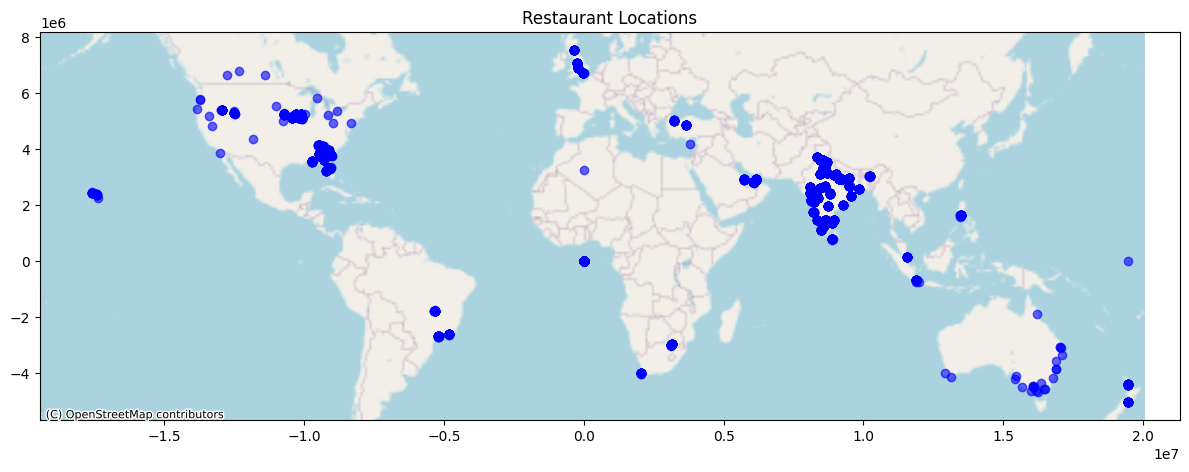

In [43]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df_restaurant['Longitude'], df_restaurant['Latitude'])]
geo_df = gpd.GeoDataFrame(df_restaurant, geometry=geometry, crs="EPSG:4326")

# Convert to web mercator
geo_df = geo_df.to_crs(epsg=3857)

# Plot
ax = geo_df.plot(figsize=(12, 8), alpha=0.6, color='blue')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Restaurant Locations")
plt.tight_layout()
plt.show()


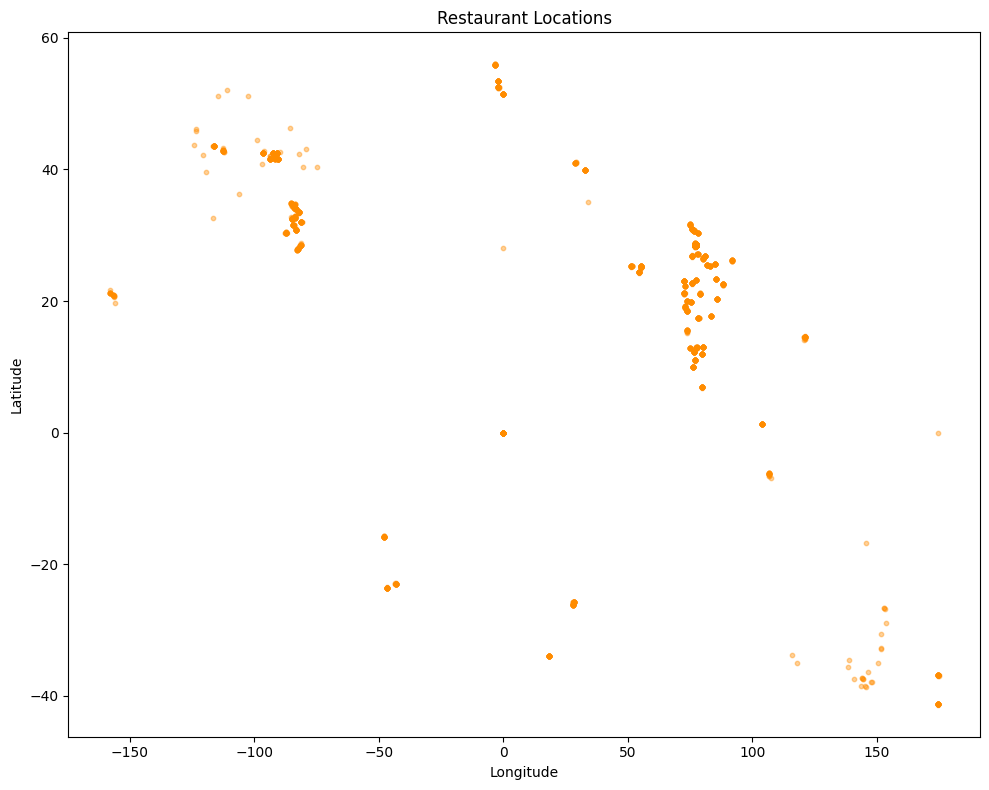

In [44]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df_restaurant['Longitude'], 
    df_restaurant['Latitude'], 
    alpha=0.4, 
    s=10, 
    c='darkorange'
)
plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


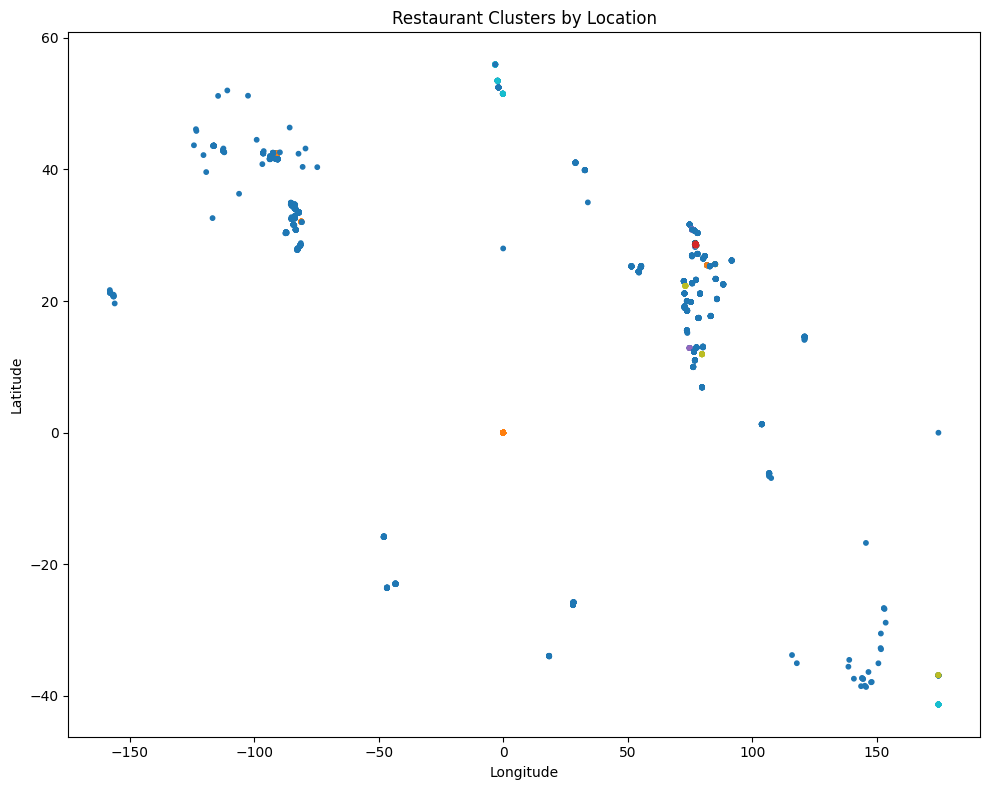

In [45]:
from sklearn.cluster import DBSCAN
import numpy as np

coords = df_restaurant[['Latitude', 'Longitude']].dropna().to_numpy()


db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
df_restaurant['Cluster'] = db.labels_


plt.figure(figsize=(10, 8))
plt.scatter(
    df_restaurant['Longitude'], 
    df_restaurant['Latitude'], 
    c=df_restaurant['Cluster'], 
    cmap='tab10', 
    s=10
)
plt.title('Restaurant Clusters by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


### Task 4 : Restaurant Chains
### Identify if there are any restaurant chains present in the dataset. Analyze the ratings and popularity of different restaurant chains.


In [46]:

name_counts = df_restaurant['Restaurant Name'].value_counts()

chains = name_counts[name_counts > 1]
print("🏪 Potential Restaurant Chains:\n", chains.head(10))


🏪 Potential Restaurant Chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [47]:

df_restaurant['Is Chain'] = df_restaurant['Restaurant Name'].isin(chains.index)


In [48]:

chain_ratings = (
    df_restaurant[df_restaurant['Is Chain']]
    .groupby('Restaurant Name')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

print("🌟 Top-Rated Chains:\n", chain_ratings.head(10))


🌟 Top-Rated Chains:
 Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Gymkhana                     4.700
The Cheesecake Factory       4.650
Dishoom                      4.600
Garota de Ipanema            4.600
Chili's                      4.580
Name: Aggregate rating, dtype: float64


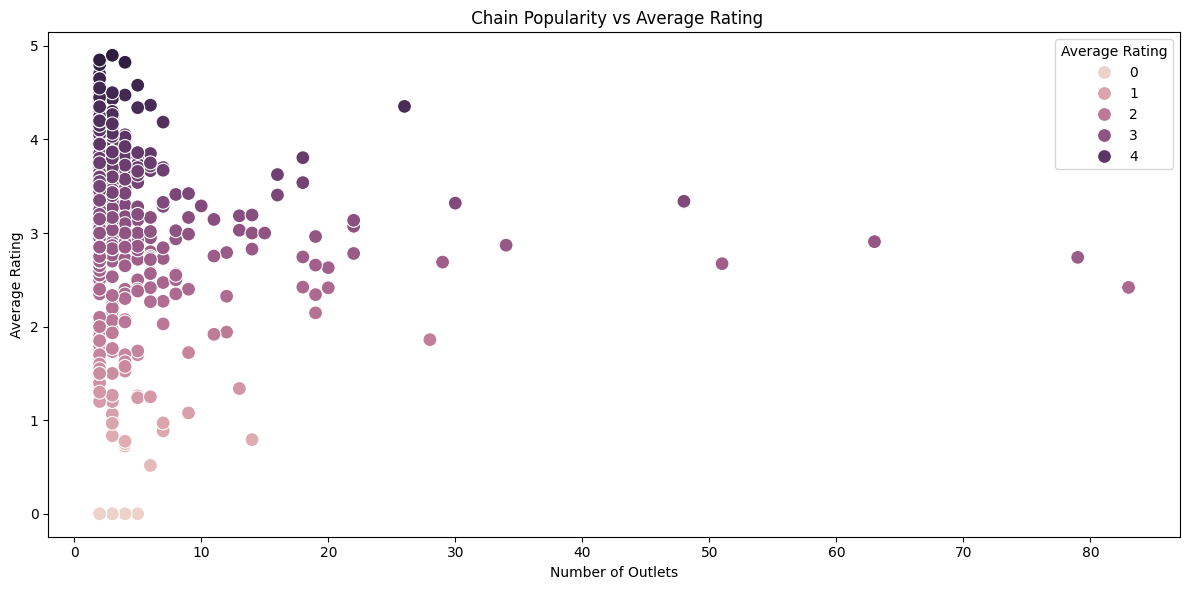

In [49]:
chain_summary = pd.DataFrame({
    'Outlet Count': chains,
    'Average Rating': chain_ratings
}).dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=chain_summary,
    x='Outlet Count',
    y='Average Rating',
    hue='Average Rating',
    
    s=100
)
plt.title(' Chain Popularity vs Average Rating')
plt.xlabel('Number of Outlets')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


## Level 3
### Task 1 : Restaurant Reviews
### Analyze the text reviews to identify the most common positive and negative keywords. Calculate the average length of reviews and explore if there is a relationship between review length and rating.


In [56]:
print(df_restaurant.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Normalized Cuisines', 'Cluster', 'Is Chain'],
      dtype='object')


In [59]:
df_restaurant['Rating text'].value_counts()


Rating text
Average      3735
Not rated    2146
Good         2098
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [60]:
positive = ['Excellent', 'Very Good', 'Good']
neutral = ['Average']
negative = ['Poor']


In [61]:
def get_sentiment(text):
    if text in positive: return 'Positive'
    elif text in negative: return 'Negative'
    elif text in neutral: return 'Neutral'
    return 'Unknown'

df_restaurant['Sentiment'] = df_restaurant['Rating text'].apply(get_sentiment)


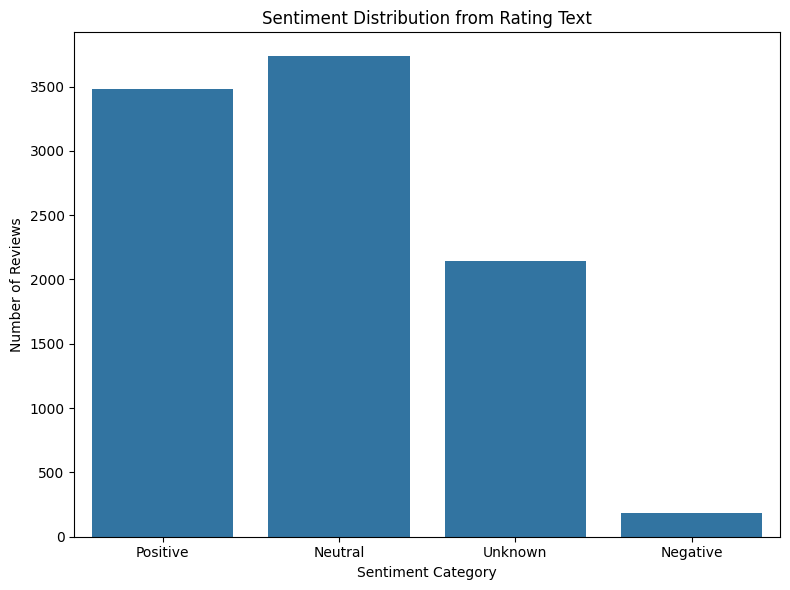

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_restaurant, x='Sentiment')
plt.title('Sentiment Distribution from Rating Text')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


In [69]:
# Character length
df_restaurant['Review Length'] = df_restaurant['Rating text'].astype(str).apply(len)


# Average length
avg_length = df_restaurant['Review Length'].mean()
print(f"📝 Average Review Length: {avg_length:.2f} characters")


📝 Average Review Length: 7.02 characters


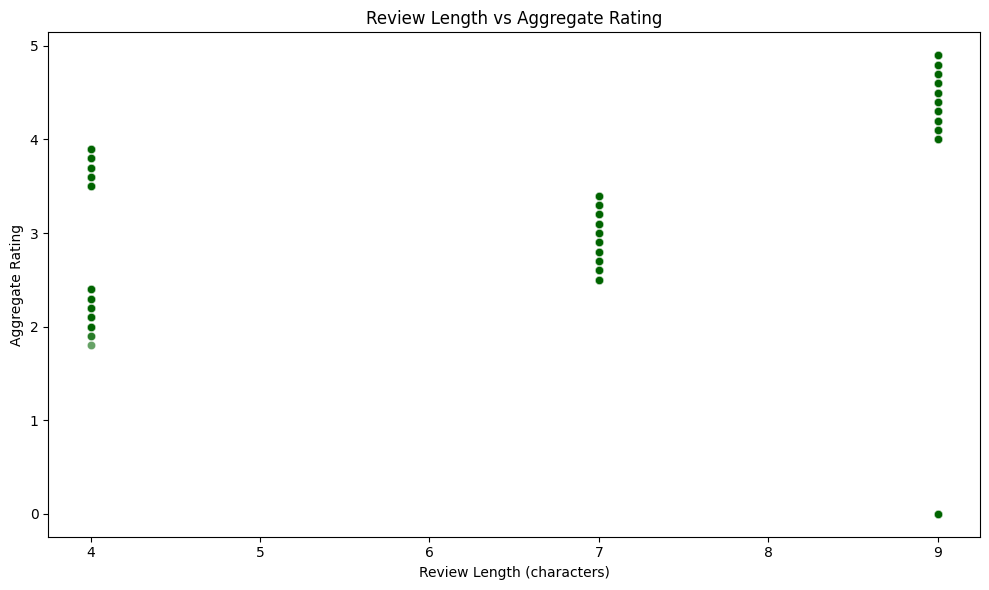

In [66]:


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_restaurant,
    x='Review Length',
    y='Aggregate rating',
    alpha=0.6,
    color='darkgreen'
)
plt.title('Review Length vs Aggregate Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()


In [67]:
correlation = df_restaurant[['Review Length', 'Aggregate rating']].corr().iloc[0, 1]
print(f"📈 Correlation between Review Length and Rating: {correlation:.2f}")


📈 Correlation between Review Length and Rating: -0.48


In [68]:
df_restaurant.groupby('Sentiment')['Review Length'].mean()


Sentiment
Negative    4.000000
Neutral     7.000000
Positive    5.983899
Unknown     9.000000
Name: Review Length, dtype: float64

### Task 3 :  Task: Price Range vs. Online Delivery and Table Booking
### Analyze if there is a relationship between the price range and the availability of online delivery and table booking. Determine if higher-priced restaurants are more likely to offer these services.

In [70]:
df_restaurant['Online Delivery'] = df_restaurant['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
df_restaurant['Table Booking'] = df_restaurant['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)


In [71]:
online_delivery_summary = (
    df_restaurant.groupby('Price range')['Online Delivery']
    .mean()
    .reset_index()
)

print(online_delivery_summary)


   Price range  Online Delivery
0          1.0              0.0
1          2.0              0.0
2          3.0              0.0
3          4.0              0.0


In [72]:
table_booking_summary = (
    df_restaurant.groupby('Price range')['Table Booking']
    .mean()
    .reset_index()
)

print(table_booking_summary)


   Price range  Table Booking
0          1.0       0.000225
1          2.0       0.076874
2          3.0       0.457386
3          4.0       0.468376


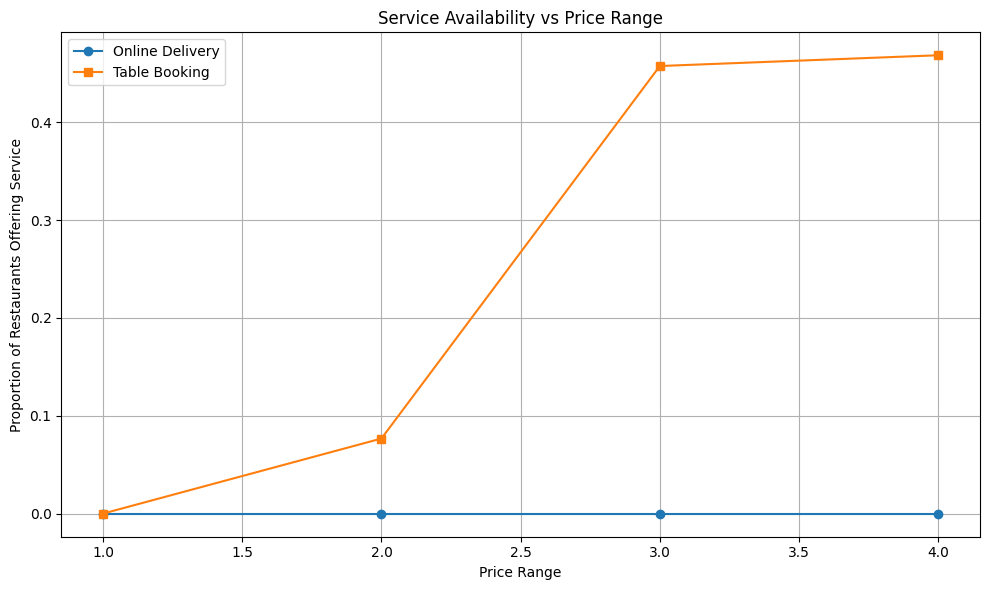

In [ ]:
plt.figure(figsize=(10, 6))

# Online Delivery
plt.plot(online_delivery_summary['Price range'], online_delivery_summary['Online Delivery'], marker='o', label='Online Delivery')

# Table Booking
plt.plot(table_booking_summary['Price range'], table_booking_summary['Table Booking'], marker='s', label='Table Booking')

plt.title('Service Availability vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion of Restaurants Offering Service')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
